<a href="https://colab.research.google.com/github/20JUNE22/capstone2023/blob/main/lr_FoodDesert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Food Desert

### Load data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
# load cleaned data
df = pd.read_excel("https://github.com/20JUNE22/capstone2023/raw/main/clean_data.xlsx")
df

,EastofUS,Urban,LowIncomeTracts,PCTGQTRS,PovertyRate,MedianFamilyIncome,TractKids,TractSeniors,TractWhite,TractBlack,...,log10_TractSeniors,log10_TractWhite,log10_TractBlack,log10_TractAsian,log10_TractNHOPI,log10_TractAIAN,log10_TractOMultir,log10_TractHispanic,log10_TractHUNV,log10_TractSNAP
0,1,1,0,0.00,11.3,81250,507,221,1622,217,...,2.346353,3.210319,2.338456,1.176091,0.000000,1.176091,1.662758,1.653213,0.845098,2.012837
1,1,1,1,8.34,17.9,49000,606,214,888,1217,...,2.332438,2.948902,3.085647,0.778151,0.000000,0.778151,1.748188,1.880814,1.954243,2.195900
2,1,1,0,0.00,15.0,62609,894,439,2576,647,...,2.643453,3.411114,2.811575,1.255273,0.778151,1.079181,2.071882,1.944483,2.000000,2.238046
3,1,1,0,0.00,2.8,70607,1015,904,4086,193,...,2.956649,3.611405,2.287802,1.278754,0.698970,1.079181,1.875061,1.934498,1.342423,1.995635
4,1,1,0,1.68,15.2,96334,3162,1126,8666,1437,...,3.051924,3.937869,3.157759,2.472756,1.000000,1.690196,2.492760,2.551450,2.363612,2.531479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71756,0,0,0,1.71,9.7,67254,884,593,3106,6,...,2.773786,3.492341,0.845098,1.204120,0.000000,1.447158,2.238046,2.491362,1.792392,1.812913
71757,0,1,0,0.38,11.6,64152,674,399,2377,5,...,2.602060,3.376212,0.778151,1.380211,0.000000,1.612784,2.344392,2.650308,1.949390,1.623249
71758,0,1,0,2.87,16.3,69605,614,516,2312,11,...,2.713491,3.364176,1.079181,1.041393,0.301030,1.431364,2.262451,2.610660,1.380211,1.812913
71759,0,0,0,7.60,17.5,74500,655,499,3179,15,...,2.698970,3.502427,1.204120,1.041393,0.301030,1.681241,1.799341,1.963788,1.681241,1.544068


In [ ]:
# drop the irrelevant inputs
fd = df.drop(df.columns[3:17], axis=1)


fd.head()

,EastofUS,Urban,LowIncomeTracts,FoodDesert,log10_PCTGQTRS,log10_PovertyRate,log10_MedianFamilyIncome,log10_TractKids,log10_TractSeniors,log10_TractWhite,log10_TractBlack,log10_TractAsian,log10_TractNHOPI,log10_TractAIAN,log10_TractOMultir,log10_TractHispanic,log10_TractHUNV,log10_TractSNAP
0,1,1,0,1,0.000000,1.089905,4.896262,2.705864,2.346353,3.210319,2.338456,1.176091,0.000000,1.176091,1.662758,1.653213,0.845098,2.012837
1,1,1,1,1,0.970347,1.276462,4.667472,2.783189,2.332438,2.948902,3.085647,0.778151,0.000000,0.778151,1.748188,1.880814,1.954243,2.195900
2,1,1,0,1,0.000000,1.204120,4.778954,2.951823,2.643453,3.411114,2.811575,1.255273,0.778151,1.079181,2.071882,1.944483,2.000000,2.238046
3,1,1,0,1,0.000000,0.579784,4.833205,3.006894,2.956649,3.611405,2.287802,1.278754,0.698970,1.079181,1.875061,1.934498,1.342423,1.995635
4,1,1,0,1,0.428135,1.209515,4.972369,3.500099,3.051924,3.937869,3.157759,2.472756,1.000000,1.690196,2.492760,2.551450,2.363612,2.531479


### Method selection

In [ ]:
# divided fd data into the independent and dependent variables
X = fd.drop(['FoodDesert'], axis = 1) # all independent
y = fd['FoodDesert']  # target

X.head()

,EastofUS,Urban,LowIncomeTracts,log10_PCTGQTRS,log10_PovertyRate,log10_MedianFamilyIncome,log10_TractKids,log10_TractSeniors,log10_TractWhite,log10_TractBlack,log10_TractAsian,log10_TractNHOPI,log10_TractAIAN,log10_TractOMultir,log10_TractHispanic,log10_TractHUNV,log10_TractSNAP
0,1,1,0,0.000000,1.089905,4.896262,2.705864,2.346353,3.210319,2.338456,1.176091,0.000000,1.176091,1.662758,1.653213,0.845098,2.012837
1,1,1,1,0.970347,1.276462,4.667472,2.783189,2.332438,2.948902,3.085647,0.778151,0.000000,0.778151,1.748188,1.880814,1.954243,2.195900
2,1,1,0,0.000000,1.204120,4.778954,2.951823,2.643453,3.411114,2.811575,1.255273,0.778151,1.079181,2.071882,1.944483,2.000000,2.238046
3,1,1,0,0.000000,0.579784,4.833205,3.006894,2.956649,3.611405,2.287802,1.278754,0.698970,1.079181,1.875061,1.934498,1.342423,1.995635
4,1,1,0,0.428135,1.209515,4.972369,3.500099,3.051924,3.937869,3.157759,2.472756,1.000000,1.690196,2.492760,2.551450,2.363612,2.531479


In [ ]:
y

0        1
1        1
2        1
3        1
4        1
        ..
71756    1
71757    0
71758    0
71759    1
71760    1
Name: FoodDesert, Length: 71761, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Load the data and split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Define the models you want to compare
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000, random_state=123)),
    ('Decision Tree', DecisionTreeClassifier(random_state=123)),
    ('Random Forest', RandomForestClassifier(random_state=123)),
    ('XGBoost', XGBClassifier(random_state=123)),
    ('LightGBM', LGBMClassifier(random_state=123)),
    ('SVM', SVC(random_state=123)),
    ('KNN', KNeighborsClassifier())
]

# Train and evaluate each model
for name, model in models:
    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = model.predict(X_test)

    # Evaluate the model's performance using common metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Print the model's performance metrics
    print(f"{name} Results:")
    print(f"Accuracy: {accuracy:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F1 Score: {f1:.3f}")
    print()

Logistic Regression Results:
Accuracy: 0.742
Precision: 0.685
Recall: 0.582
F1 Score: 0.629

Decision Tree Results:
Accuracy: 0.678
Precision: 0.569
Recall: 0.589
F1 Score: 0.579

Random Forest Results:
Accuracy: 0.763
Precision: 0.716
Recall: 0.615
F1 Score: 0.662

XGBoost Results:
Accuracy: 0.757
Precision: 0.694
Recall: 0.631
F1 Score: 0.661

LightGBM Results:
Accuracy: 0.763
Precision: 0.707
Recall: 0.630
F1 Score: 0.666

SVM Results:
Accuracy: 0.757
Precision: 0.697
Recall: 0.624
F1 Score: 0.659

KNN Results:
Accuracy: 0.723
Precision: 0.641
Recall: 0.601
F1 Score: 0.620



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def print_performance_metrics(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Accuracy: {accuracy:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F1 Score: {f1:.3f}")

### Logistics Regression baseline model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define logistic regression model with default hyperparameters
lr_base = LogisticRegression(max_iter=1000)

# Train the model
lr_base.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = lr_base.predict(X_test)

# Evaluate the model's performance using common metrics
accuracy = accuracy_score(y_test, y_pred)


# Print the model's performance metrics
print("The baseline model Results:")
print_performance_metrics(y_test, y_pred)

The baseline model Results:
Accuracy: 0.742
Precision: 0.685
Recall: 0.582
F1 Score: 0.629


Accuracy: the baseline model has an accuracy of 0.636, which means that it correctly classified 63.6% of the test set samples.

Precision:the baseline model has a precision of 0.722, which means that when it predicted a positive label, it was correct 72.2% of the time.

Recall: the baseline model has a recall of 0.406, which means that it correctly identified only 40.6% of the actual positive samples.

Based on these results, it appears that the baseline model has room for improvement, particularly in terms of recall. A low recall score means that the model is failing to identify many of the areas that are actually food deserts.

### Feature selection

#### L1 regularization

In [ ]:
from sklearn.linear_model import LogisticRegression

# Create a logistic regression model with L1 regularization (Lasso)
lr_model = LogisticRegression(penalty='l1', solver='liblinear', random_state=123, max_iter=100)

# Fit the model on the training data
lr_model.fit(X_train, y_train)

# Predict target values on the test set
y_pred1 = lr_model.predict(X_test)

# Print the model's performance metrics
print_performance_metrics(y_test, y_pred1)

Accuracy: 0.743
Precision: 0.686
Recall: 0.582
F1 Score: 0.630


> L1 regularization doesn't shows significant improvement.

#### Recursive feature elimination (RFE)

In [ ]:
from sklearn.feature_selection import RFE

# Load the data and split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# create a logistic regression object
lr2 = LogisticRegression(random_state=123, max_iter=1000)

# create a recursive feature eliminator object
rfe = RFE(lr2, n_features_to_select=5)

# fit the recursive feature eliminator to the training data
rfe.fit(X_train, y_train)

# transform the training and testing data to include only the selected features
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

# fit a logistic regression model using the selected features
lr_rfe = LogisticRegression(random_state=123)
lr_rfe.fit(X_train_rfe, y_train)

# make predictions on the testing data
y_pred2 = lr_rfe.predict(X_test_rfe)

# Print the model's performance metrics
print_performance_metrics(y_test, y_pred2)

Accuracy: 0.736
Precision: 0.685
Recall: 0.553
F1 Score: 0.612


> REF does not improve the model. Since the three feature selections that I made did not improve the model's performance, I will proceed to the next step of hyperparameter tuning.

### Class imbalance

In [ ]:
# Define the logistic regression model
lr_bal = LogisticRegression(class_weight='balanced',max_iter=1000,random_state=123)

# Fit the model on the training data
lr_bal.fit(X_train, y_train)

# Make predictions on the testing data
y_pred3 = lr_bal.predict(X_test)

# Print the model's performance metrics
print_performance_metrics(y_test, y_pred3)

Accuracy: 0.721
Precision: 0.607
Recall: 0.728
F1 Score: 0.662


> The logistic regression model with balanced class weights shows significant improvement for the recall (0.582 -> 0.728).

### Hyperparameter tuning

In [ ]:
# random sample of the dataset for hyperparameter tuning

# Define the fraction of data to use for hyperparameter tuning
fraction = 0.1

# Randomly sample a fraction of the dataset
sampled_data = fd.sample(frac=fraction, random_state=123)

# Split the sampled data into features (X) and target (y)
X_sampled = sampled_data.drop(columns=["FoodDesert"])
y_sampled = sampled_data["FoodDesert"]

# Split the sampled data into train and test sets
Xs_train, Xs_test, ys_train, ys_test = train_test_split(X_sampled, y_sampled, test_size=0.2, random_state=123)

In [ ]:
y_sampled[y_sampled==1].sum()/len(y_sampled)

0.3722129319955407

In [ ]:
y[y==1].sum()/len(y)

0.38008110254873817

> The results suggest that the sampled data is representative of the overall dataset in terms of the distribution of the food desert.

In [ ]:
# evaluating the performance of a classification model on both training and testing datasets
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n==========================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred):.3f}")
        print("__________________________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("__________________________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n==========================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred):.3f}")
        print("_________________________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_________________________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

#### Grid Search Cross Validation

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter search space
penalty = ['l1', 'l2']
C = [0.001, 0.01, 0.1, 1, 10, 100]
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
max_iter = [100, 1000, 10000]
class_weight = [None, 'balanced']

hyperparameters = {
    'penalty': penalty,
    'C': C,
    'solver': solver,
    'max_iter': max_iter,
    'class_weight': class_weight,
    'random_state': [123]
}

# Create the logistic regression classifier
lr_clf = LogisticRegression(random_state=123, max_iter = 10000)

# Perform grid search cross-validation
lr_cv = GridSearchCV(
    estimator=lr_clf,
    param_grid=hyperparameters,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

# Fit the grid search CV on the sampled data
lr_cv.fit(Xs_train, ys_train)

# Print the best hyperparameters
lr_best_params = lr_cv.best_params_
print("Best parameters:")
print(lr_best_params)

# Create a logistic regression classifier with the best parameters
lr_clf_best = LogisticRegression(**lr_best_params)

# Fit the classifier on the sampled data
lr_clf_best.fit(Xs_train, ys_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
540 fits failed out of a total of 1800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: S

Best parameters:
{'C': 0.1, 'class_weight': None, 'max_iter': 1000, 'penalty': 'l1', 'random_state': 123, 'solver': 'saga'}


LogisticRegression(C=0.1, max_iter=1000, penalty='l1', random_state=123,
                   solver='saga')

In [ ]:
# Save the model to a file
from joblib import dump

dump(lr_clf_best, 'lr1.pkl')

['lr1.pkl']

In [ ]:
# Print the performance metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
y_pred4 = lr_clf_best.predict(X_test)
print_performance_metrics(y_test, y_pred4)

print_score(lr_clf_best, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf_best, X_train, y_train, X_test, y_test, train=False)

Accuracy: 0.746
Precision: 0.706
Recall: 0.556
F1 Score: 0.622
Train Result:
Accuracy Score: 0.741
__________________________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.754588      0.708712  0.741151      0.731650      0.737104
recall         0.862141      0.544678  0.741151      0.703409      0.741151
f1-score       0.804787      0.615961  0.741151      0.710374      0.732823
support    35529.000000  21879.000000  0.741151  57408.000000  57408.000000
__________________________________________________________
Confusion Matrix: 
 [[30631  4898]
 [ 9962 11917]]

Test Result:
Accuracy Score: 0.746
_________________________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy     macro avg  weighted avg
precision     0.762843     0.705882  0.745976      0.734363      0.741429
recall        0.860444     0.555967  0.745976      0.708206     

> The cross-validated model rf_clf_best: accuracy of 0.746.

>Best parameters:
{'C': 0.1, 'class_weight': None, 'max_iter': 1000, 'penalty': 'l1', 'random_state': 123, 'solver': 'saga'}

### Ensembling

#### Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier

# Define the base classifier (Logistic Regression)
base_lr = LogisticRegression(random_state=123)

# Set up the bagging classifier
bagging = BaggingClassifier(base_estimator=base_lr, n_estimators=10, random_state=123)

# Fit the bagging classifier to the training data
bagging.fit(X_train, y_train)

# Make predictions on the testing data
y_pred5 = bagging.predict(X_test)


# Print the model's performance metrics
print_performance_metrics(y_test, y_pred5)

Accuracy: 0.743
Precision: 0.687
Recall: 0.582
F1 Score: 0.630


#### Boosting

In [ ]:
from sklearn.datasets import make_classification
from sklearn.ensemble import AdaBoostClassifier

# Define the base classifier (Logistic Regression)
base_lr = LogisticRegression(random_state=123)

# Define the AdaBoost classifier with Logistic Regression as the base estimator
ada = AdaBoostClassifier(base_estimator=base_lr, n_estimators=50, learning_rate=0.1)

# Train the AdaBoost ensemble
ada.fit(X_train, y_train)

# Make predictions on the test set
y_pred6 = ada.predict(X_test)

# Print the model's performance metrics
print_performance_metrics(y_test, y_pred6)

Accuracy: 0.630
Precision: 0.801
Recall: 0.020
F1 Score: 0.039


#### Voting

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)


# Define the individual classifiers
knn = KNeighborsClassifier()
rf = RandomForestClassifier(random_state=123)
lgbm = LGBMClassifier(random_state=123)
xgb = XGBClassifier(random_state=123)
lr = LogisticRegression(C= 0.1, class_weight= None, penalty= 'l1', solver='saga',max_iter=1000,random_state=123)
svc = SVC(random_state=123)

# Define the voting classifier
voting_clf = VotingClassifier(
    estimators=[('knn', knn), ('rf', rf), ('lgbm', lgbm), ('xgb', xgb), ('lr', lr), ('svc', svc)],
    voting='hard'
)

# Train the voting classifier
voting_clf.fit(X_train, y_train)

# Evaluate the voting classifier
y_pred7 = voting_clf.predict(X_test)

# Print the model's performance metrics
print_performance_metrics(y_test, y_pred7)

Accuracy: 0.763
Precision: 0.722
Recall: 0.600
F1 Score: 0.655


### Validation

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Perform cross-validation
scores = cross_val_score(lr_bal, X, y, cv=5)

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())


Cross-Validation Scores: [0.67762837 0.67920847 0.72394091 0.74616778 0.7039437 ]
Mean Accuracy: 0.7061778479881496


In [ ]:
# Print the performance metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
y_pred = lr_bal.predict(X_test)
print_performance_metrics(y_test, y_pred)

print_score(lr_bal, X_train, y_train, X_test, y_test, train=True)
print_score(lr_bal, X_train, y_train, X_test, y_test, train=False)

Accuracy: 0.721
Precision: 0.607
Recall: 0.728
F1 Score: 0.662
Train Result:
Accuracy Score: 0.725
__________________________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.812081      0.617467  0.724551      0.714774      0.737911
recall         0.722002      0.728690  0.724551      0.725346      0.724551
f1-score       0.764397      0.668484  0.724551      0.716440      0.727843
support    35529.000000  21879.000000  0.724551  57408.000000  57408.000000
__________________________________________________________
Confusion Matrix: 
 [[25652  9877]
 [ 5936 15943]]

Test Result:
Accuracy Score: 0.721
_________________________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy     macro avg  weighted avg
precision     0.813721     0.607237  0.720686      0.710479      0.736093
recall        0.716423     0.727761  0.720686      0.722092     

> The final model is the model with balanced class weights.


The accuracy score is 0.721, which means that the model classified 72.1% of the instances correctly.

The precision for class 1 is 0.607, which means that of all the instances predicted as class 1, 60.7% are actually class 1.

The recall for class 1 is 0.728, which means that of all the instances that are actually class 1, the model correctly identified 72.8% of them.

The F1-score is 0.662.


In [ ]:
# Save the final model to a file
from joblib import dump

dump(lr_bal, 'lr2.pkl')

['lr2.pkl']

### Visualization

In [ ]:
# Load the saved model from a file
from joblib import load
fd_lr= load('lr2.pkl')

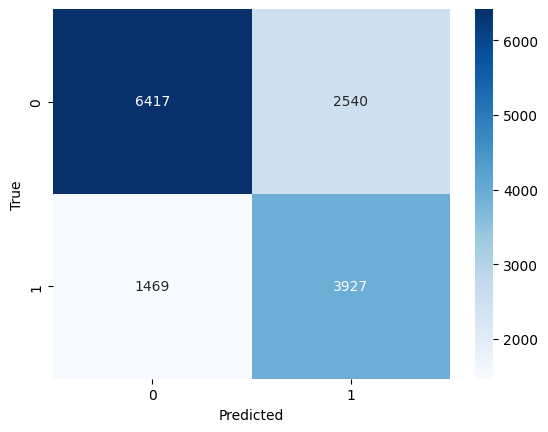

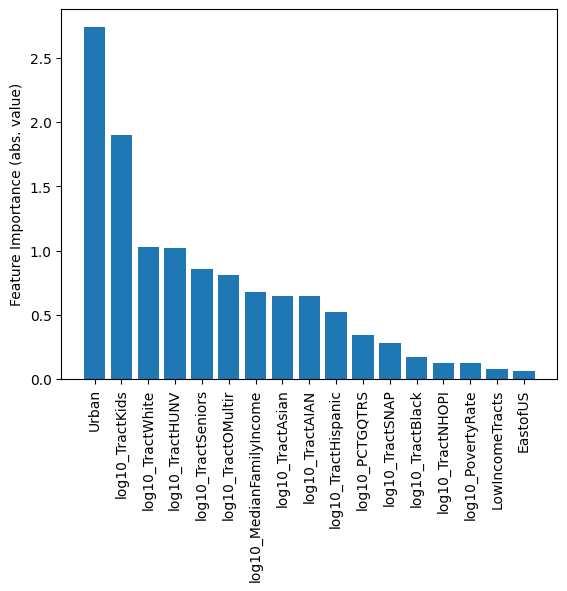

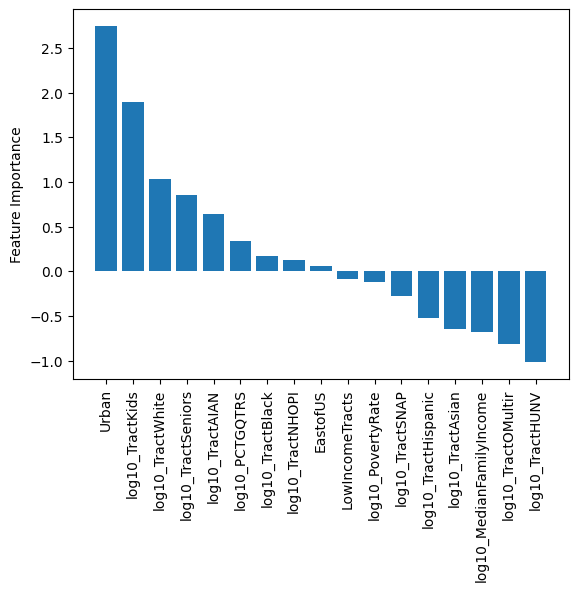

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

# Confusion matrix
y_pred = fd_lr.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# Get the absolute value of the coefficients
coef_abs = np.abs(fd_lr.coef_[0])

# Sort the coefficients in descending order
sorted_idx = np.argsort(coef_abs)[::-1]

# Extract the names of the features
feature_names = np.array(X.columns)

# Plot the feature importance using a bar chart
plt.bar(feature_names[sorted_idx], coef_abs[sorted_idx])
plt.xticks(rotation=90)
plt.ylabel('Feature Importance (abs. value)')
plt.show()


# Sort the coefficients in descending order
sorted_idx = np.argsort(fd_lr.coef_[0])[::-1]

# Extract the names of the features
feature_names = np.array(X.columns)

# Plot the feature importance using a bar chart
plt.bar(feature_names[sorted_idx], fd_lr.coef_[0][sorted_idx])
plt.xticks(rotation=90)
plt.ylabel('Feature Importance')
plt.show()




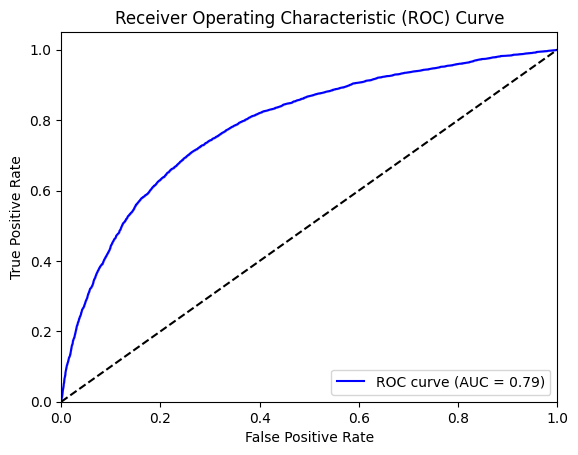

In [ ]:
# ROC curve
y_pred_prob = fd_lr.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)
sns.lineplot(x=fpr, y=tpr, color='b', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
